In [9]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

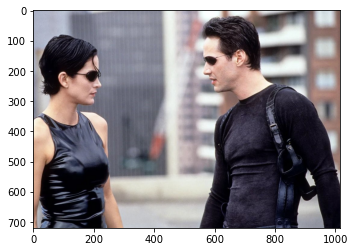

In [6]:
img = Image.open("matrix.jfif")
imshow(img)

In [103]:
data = np.asarray(img)

In [104]:
s = data.shape
print(s)

(720, 1015, 3)


In [105]:
data.shape = (s[0]*s[1], 3)
print(data.shape)

(730800, 3)


In [112]:
ndata = data / 255.0
ndata = np.array([ [c[0]**1.5, c[1]**0.8, c[2]**1.5] for c  in ndata])
ndata = np.array(255 * ndata, dtype=np.uint8)
ndata.shape = s

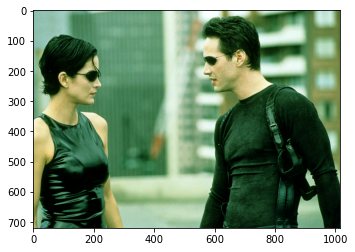

In [113]:
nimg = Image.fromarray(ndata)
imshow(nimg)